# Importar libreríás

In [2]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns


from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.prompt import Prompt

# Importando bases de datos

In [3]:
#df_title_basics_1 = pd.read_csv('./db/title_basics_1_cleaned.csv', encoding='ISO-8859-1')

df_title_basics_1 = pd.read_csv('./db/title_basics_1_cleaned.csv', encoding='utf-8')



In [4]:
df_title_ratings_2 = pd.read_csv('./db/title_ratings_2_cleaned.csv', encoding='utf-8')

In [12]:
df_name_basics_3 = pd.read_csv('./db/name_basics_3_cleaned.csv', encoding='ISO-8859-1')

In [6]:
df_title_crew_4 = pd.read_csv('./db/title_crew_4_cleaned.csv', encoding='ISO-8859-1')

In [7]:
df_title_episode_5 = pd.read_csv('./db/title_episode_5_cleaned.csv', encoding='ISO-8859-1')

# Preguntas de title basics

##### 1. ¿Cuál es la distribución de películas por género?

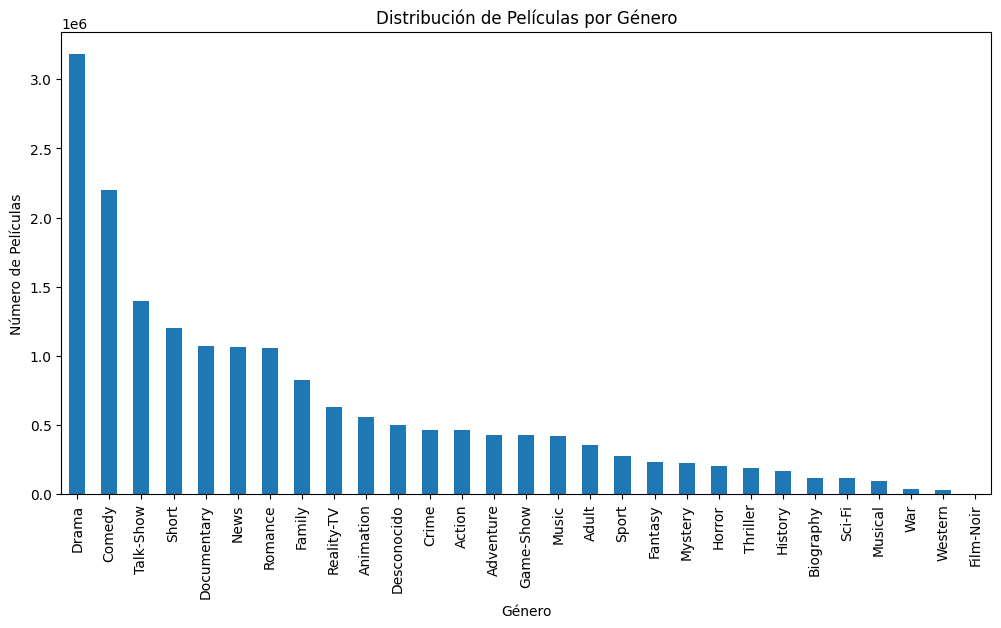

In [8]:
genres = df_title_basics_1['genres'].str.split(',').explode()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Películas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()

##### 2. ¿Cuántas películas se han lanzado cada año desde el 2000?

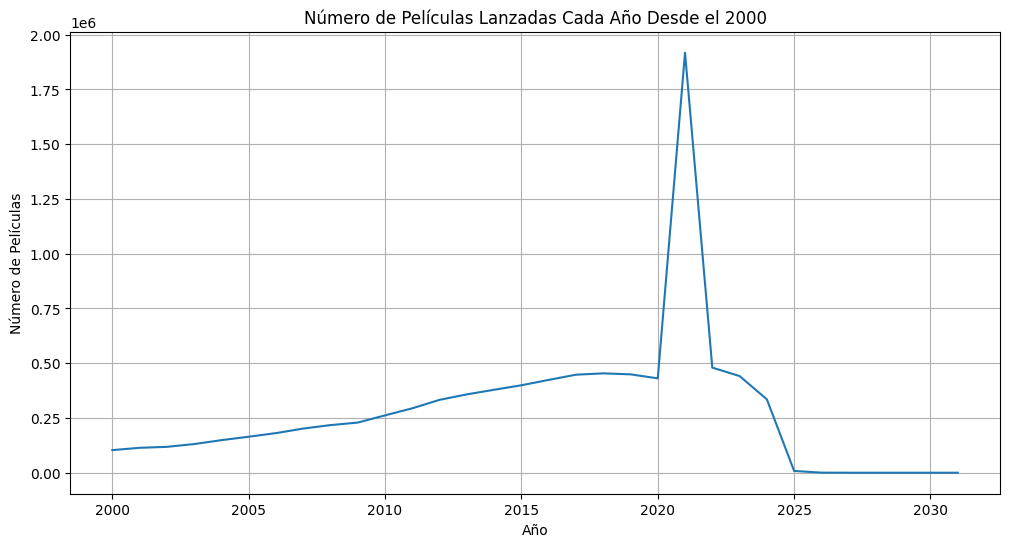

In [9]:
# Filtrar películas lanzadas desde el año 2000
df_2000 = df_title_basics_1[df_title_basics_1['startYear'].astype(int) >= 2000]

# Contar el número de películas por año
yearly_counts = df_2000['startYear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line')
plt.title('Número de Películas Lanzadas Cada Año Desde el 2000')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

##### 3. ¿Cuáles son los géneros más populares por década?

<Figure size 1800x600 with 0 Axes>

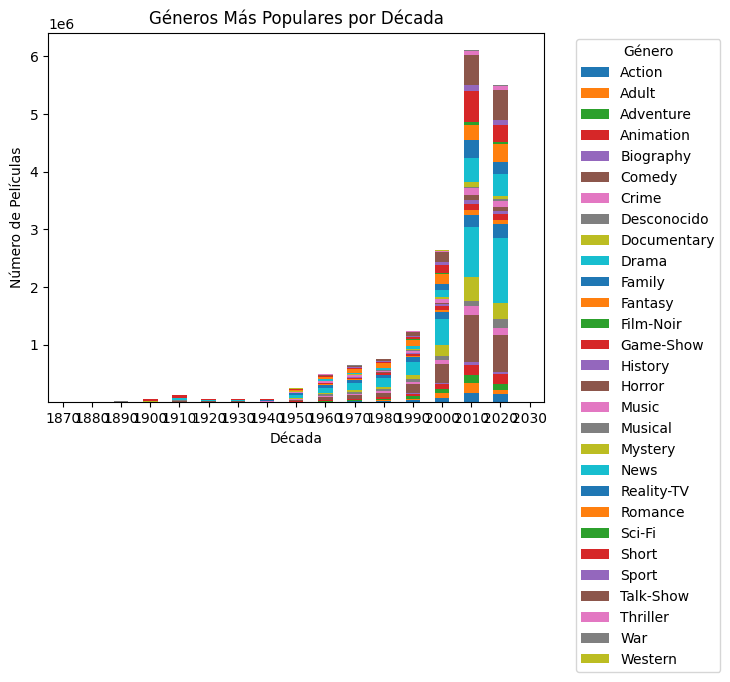

In [14]:
# Crear una columna para la década
df_title_basics_1['decade'] = (df_title_basics_1['startYear'].astype(int) // 10) * 10

# Contar los géneros por década
decade_genres = df_title_basics_1.groupby('decade')['genres'].apply(lambda x: x.str.split(',').explode()).reset_index()
decade_genre_counts = decade_genres.groupby(['decade', 'genres']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
decade_genre_counts.plot(kind='bar', stacked=True)
plt.title('Géneros Más Populares por Década')
plt.xlabel('Década')
plt.ylabel('Número de Películas')
plt.xticks(rotation=0)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### 4. ¿Cuáles son los formatos de títulos más comunes (cortometraje, película, programa de TV)?

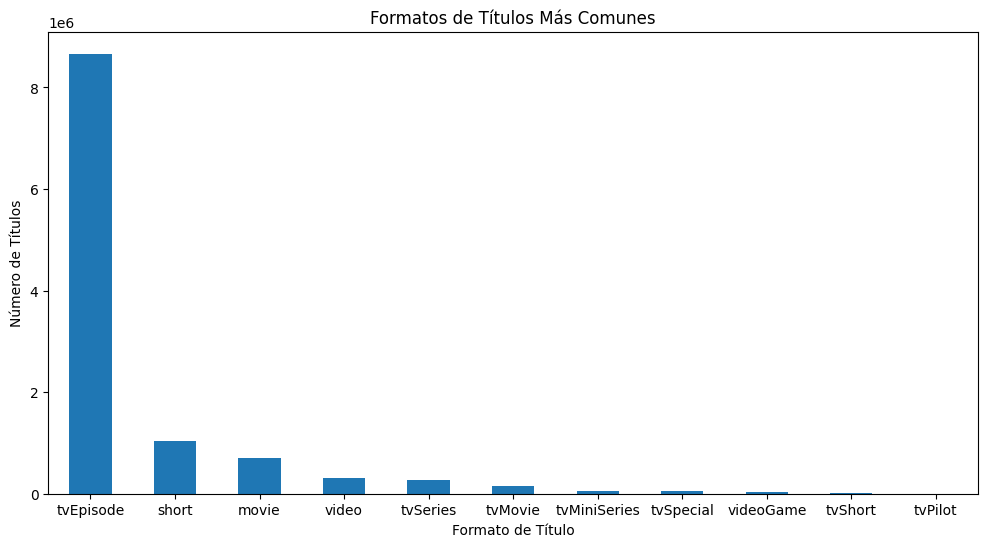

In [12]:
title_type_counts = df_title_basics_1['titleType'].value_counts()

plt.figure(figsize=(12, 6))
title_type_counts.plot(kind='bar')
plt.title('Formatos de Títulos Más Comunes')
plt.xlabel('Formato de Título')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=0)
plt.show()

##### 5. ¿Cuál es la relación entre la duración de las películas y su género?

In [31]:
# Valores únicos en runtimeMinutes
print(df_title_basics_1['runtimeMinutes'].unique())


[1 5 12 ... '3600' '539' '2088']


In [33]:
df_title_basics_1.describe()

,isAdult,startYear
count,1.127883e+07,1.127883e+07
mean,1.434726e-01,2.007865e+03
std,1.487407e+01,1.950878e+01
min,0.000000e+00,1.874000e+03
25%,0.000000e+00,2.004000e+03
50%,0.000000e+00,2.015000e+03
75%,0.000000e+00,2.021000e+03
max,2.024000e+03,2.031000e+03


<Figure size 1200x600 with 0 Axes>

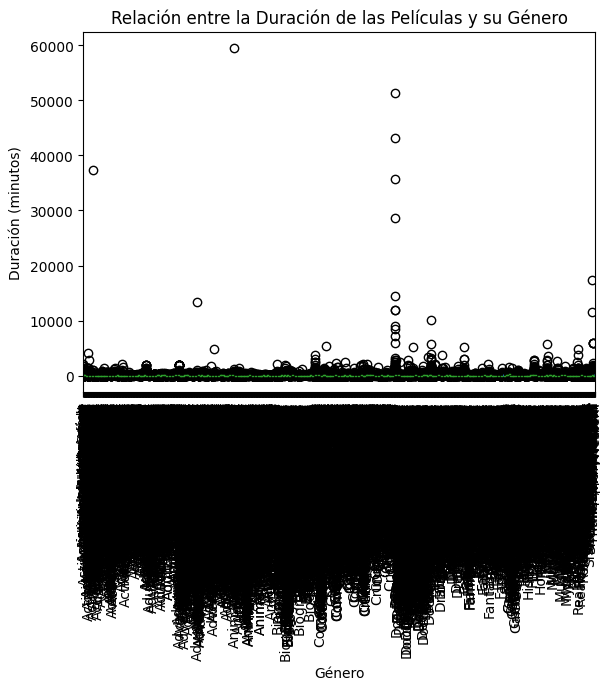

In [40]:
# Suponiendo que la duración de las películas está en una columna llamada 'runtimeMinutes'
# Nota: La tabla title_basics_1_cleaned no tiene una columna de duración, así que este es un ejemplo hipotético

plt.figure(figsize=(12, 6))
df_title_basics_1.boxplot(column='runtimeMinutes', by='genres', grid=False)
plt.title('Relación entre la Duración de las Películas y su Género')
plt.xlabel('Género')
plt.ylabel('Duración (minutos)')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()


# Preguntas de title ratings

##### 1. ¿Cómo se distribuyen las calificaciones promedio de las películas?

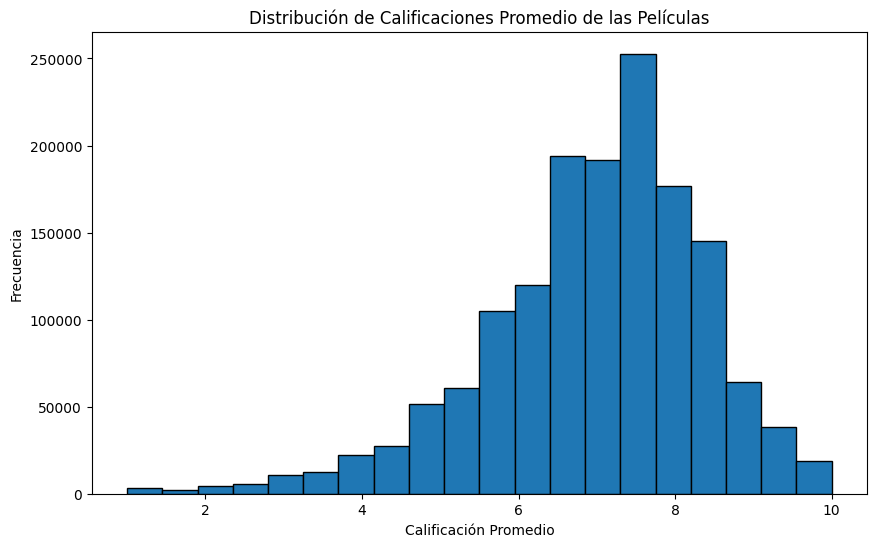

In [4]:


# Histograma de calificaciones promedio
plt.figure(figsize=(10, 6))
plt.hist(df_title_ratings_2['averageRating'], bins=20, edgecolor='black')
plt.title('Distribución de Calificaciones Promedio de las Películas')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()


##### 2. ¿Cuáles son las películas mejor calificadas por género?

In [10]:
# Unir los DataFrames
df_merged_1_2 = pd.merge(df_title_basics_1, df_title_ratings_2, on='tconst')

# Crear la consola de Rich
console = Console()


# Encontrar las películas mejor calificadas por género
top_movies_by_genre = df_merged_1_2.groupby('genres')['averageRating'].idxmax()
top_movies = df_merged_1_2.loc[top_movies_by_genre, ['primaryTitle', 'averageRating', 'genres']]

# Seleccionar el Top 10 de películas mejor calificadas
top_10_movies = top_movies.nlargest(10, 'averageRating')

# Crear la tabla para el Top 10
table = Table(title="Top 10 Películas Mejor Calificadas por Género")

# Añadir columnas
table.add_column("Título", justify="left", style="cyan", no_wrap=True)
table.add_column("Género", justify="left", style="magenta", no_wrap=True)
table.add_column("Calificación", justify="right", style="green")

# Añadir filas a la tabla
for _, row in top_10_movies.iterrows():
    table.add_row(row['primaryTitle'], row['genres'], f"{row['averageRating']:.2f}")

# Imprimir el resultado usando Rich

console.print(table)


                          Top 10 Películas Mejor Calificadas por Género                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Título                                             ┃ Género                     ┃ Calificación ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Nachtflug                                          │ Action                     │        10.00 │
│ Infamous Part 2                                    │ Action,Adventure           │        10.00 │
│ Road to Hades                                      │ Action,Adventure,Animation │        10.00 │
│ I challenge the Ender Dragon in Minecraft (Ending) │ Action,Adventure,Comedy    │        10.00 │
│ El héroe                                           │ Action,Adventure,Crime     │        10.00 │
│ Thanks For Watching                                │ Action,Adventure,Drama     │        10.00 │
│ Vol. I                                             │ Action,Adventure,Fantasy   │        10.00 │
│ Samurai's Sword                                    │ Action,Adventure,Game-Show │        10.00 │
│ Spy Cat: A Crazy Story- 3                          │ Action,Adventure,Short     │        10.00 │
│ Episode #1.1                                       │ Action,Animation,Fantasy   │        10.00 │
└────────────────────────────────────────────────────┴────────────────────────────┴──────────────┘

##### 3. ¿Existe una correlación entre el número de votos y la calificación promedio?

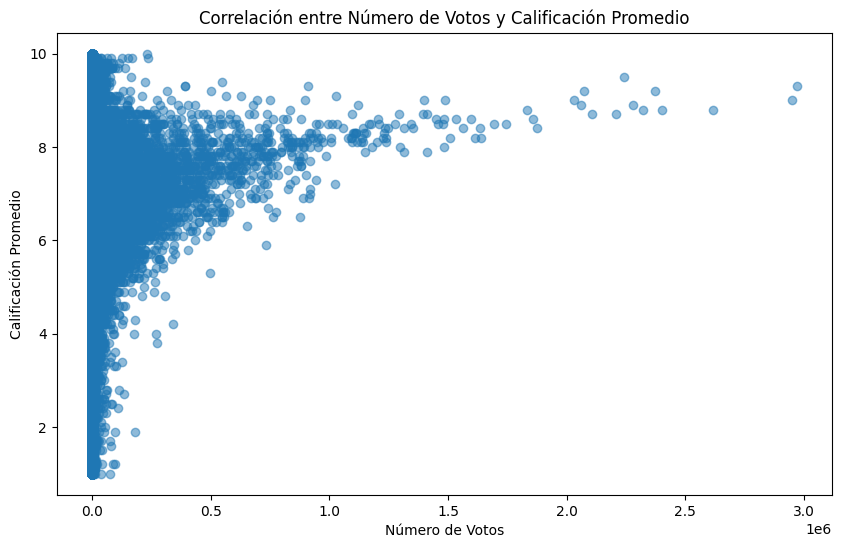

In [12]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_title_ratings_2['numVotes'], df_title_ratings_2['averageRating'], alpha=0.5)
plt.title('Correlación entre Número de Votos y Calificación Promedio')
plt.xlabel('Número de Votos')
plt.ylabel('Calificación Promedio')
plt.show()

##### 4. ¿Cuáles son los géneros con las calificaciones más altas en promedio?

In [6]:
# Calcular el promedio de calificaciones por género
genre_avg_ratings = df_merged_1_2.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

# Crear una consola para imprimir
console = Console()

# Crear una tabla con título
table = Table(title="Average Ratings por Genero")

# Añadir columnas
table.add_column("Genres", justify="left", style="cyan", no_wrap=True)
table.add_column("Average Rating", justify="right", style="green")

# Iterar sobre los datos y añadir filas
for genre, avg_rating in genre_avg_ratings.head(10).items():
    table.add_row(genre, f"{avg_rating:.2f}")

# Imprimir la tabla
console.print(table)



            Average Ratings por Genero             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Genres                         ┃ Average Rating ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Documentary,Musical,Reality-TV │           9.50 │
│ Animation,Musical,Reality-TV   │           9.40 │
│ Reality-TV,Short,Talk-Show     │           9.25 │
│ Music,War                      │           9.25 │
│ Comedy,Game-Show,Musical       │           9.22 │
│ Biography,Crime,Reality-TV     │           9.22 │
│ Family,Game-Show,Romance       │           9.20 │
│ History,Music,News             │           9.20 │
│ Documentary,Fantasy,Reality-TV │           9.20 │
│ Crime,Documentary,Talk-Show    │           9.20 │
└────────────────────────────────┴────────────────┘

##### 5. ¿Qué películas tienen la calificación más baja y más alta en la base de datos?

In [9]:
# Crear la consola de Rich
console = Console()

# Encontrar las películas con la calificación más baja y más alta
lowest_rated_movie = df_merged_1_2.loc[df_merged_1_2['averageRating'].idxmin()]
highest_rated_movie = df_merged_1_2.loc[df_merged_1_2['averageRating'].idxmax()]

# Crear un panel para destacar la película con calificación más alta
highest_panel = Panel(
    f"[bold yellow]Película con la calificación más alta:[/bold yellow]\n"
    f"[bold cyan]Título:[/bold cyan] {highest_rated_movie['primaryTitle']}\n"
    f"[bold cyan]Calificación:[/bold cyan] {highest_rated_movie['averageRating']:.1f}",
    title="🔝 Mejor Calificada", border_style="green"
)

# Crear un panel para destacar la película con calificación más baja
lowest_panel = Panel(
    f"[bold red]Película con la calificación más baja:[/bold red]\n"
    f"[bold cyan]Título:[/bold cyan] {lowest_rated_movie['primaryTitle']}\n"
    f"[bold cyan]Calificación:[/bold cyan] {lowest_rated_movie['averageRating']:.1f}",
    title="🔻 Peor Calificada", border_style="red"
)


# Imprimir el resultado usando Rich
console.print(highest_panel)
console.print(lowest_panel)


╭────────────────────────────────────────────── 🔝 Mejor Calificada ──────────────────────────────────────────────╮
│ Película con la calificación más alta:                                                                          │
│ Título: All I Know Is                                                                                           │
│ Calificación: 10.0                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── 🔻 Peor Calificada ───────────────────────────────────────────────╮
│ Película con la calificación más baja:                                                                          │
│ Título: Miss Nobody                                                                                             │
│ Calificación: 1.0                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Preguntas Name Basics

##### 1. ¿Cuáles son los actores o actrices con más títulos acreditados?

In [15]:


# Contar el número de títulos acreditados por actor/actriz
actor_title_counts = df_name_basics_3['knownForTitles'].str.split(',').apply(len).sort_values(ascending=False)

# Obtener los actores/actrices con más títulos acreditados
top_actors = df_name_basics_3.loc[actor_title_counts.index, ['primaryName', 'knownForTitles']]
top_actors['titleCount'] = actor_title_counts

# Seleccionar el Top 10
top_10_actors = top_actors.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 Actores/Actrices con Más Títulos Acreditados")

# Añadir columnas
table.add_column("Nombre", justify="left", style="cyan", no_wrap=True)
table.add_column("Títulos Acreditados", justify="left", style="magenta")
table.add_column("Número de Títulos", justify="right", style="green")

# Añadir filas
for _, row in top_10_actors.iterrows():
    table.add_row(
        row['primaryName'], 
        row['knownForTitles'], 
        str(row['titleCount'])
    )

# Imprimir la tabla
console.print(table)

                 Top 10 Actores/Actrices con Más Títulos Acreditados                  
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Nombre           ┃ Títulos Acreditados                         ┃ Número de Títulos ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Fred Astaire     │ tt0050419,tt0072308,tt0053137,tt0043044     │                 4 │
│ Lawrence Ho      │ tt4016250,tt31091860,tt0756338,tt1069273    │                 4 │
│ Eiichi Tokura    │ tt2250192,tt0795404,tt5329084,tt13311344    │                 4 │
│ Taylor Cernansky │ tt13398684,tt15408874,tt11996898,tt11996942 │                 4 │
│ Dale Place       │ tt1041829,tt0452623,tt0964517,tt0770703     │                 4 │
│ Justine Rusk     │ tt1742179,tt32262298,tt31842623,tt16265860  │                 4 │
│ Joy Ramsay       │ tt3420504,tt0848228,tt2209764,tt0800369     │                 4 │
│ Jonathan Bouzali │ tt3264142,tt6473982,tt18753124,tt8027624    │                 4 │
│ Lawrence Mann    │ tt0051247,tt0077054,tt0057441,tt0056742     │                 4 │
│ Cecile Plattner  │ tt0320691,tt0187738,tt0167456,tt0406728     │                 4 │
└──────────────────┴─────────────────────────────────────────────┴───────────────────┘

##### 2. ¿Cuál es la distribución de años de nacimiento de los profesionales del cine?

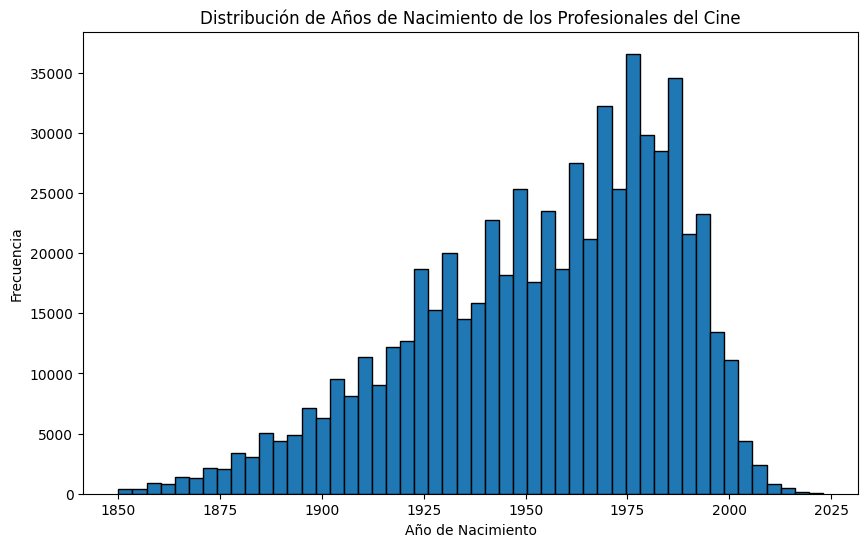

In [25]:
# Histograma de años de nacimiento

# Filtrar los años de nacimiento entre 1850 y 2023
filtered_df = df_name_basics_3.query('1850 <= birthYear <= 2023')

# Histograma de años de nacimiento
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['birthYear'].dropna(), bins=50, edgecolor='black')
# plt.hist(df_name_basics_3['birthYear'].dropna(), bins=50, edgecolor='black')
plt.title('Distribución de Años de Nacimiento de los Profesionales del Cine')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Frecuencia')
plt.show()



##### 3. ¿Cuántos directores/actores están asociados con géneros específicos?

In [19]:
# Unir los DataFrames
df_merged_1_3 = pd.merge(df_name_basics_3, df_title_basics_1, left_on='knownForTitles', right_on='tconst')

# Contar el número de directores/actores por género
genre_counts = df_merged_1_3.groupby('genres')['primaryName'].nunique().sort_values(ascending=False)

# Seleccionar el Top 10
top_10_genres = genre_counts.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 Géneros con Más Directores/Actores Asociados")

# Añadir columnas
table.add_column("Género", justify="left", style="cyan", no_wrap=True)
table.add_column("Número de Directores/Actores", justify="right", style="green")

# Añadir filas
for genre, count in top_10_genres.items():
    table.add_row(genre, str(count))

# Imprimir la tabla
console.print(table)

Top 10 Géneros con Más Directores/Actores Asociados 
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Género            ┃ Número de Directores/Actores ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Drama             │                       666554 │
│ Documentary       │                       537026 │
│ Drama,Short       │                       458214 │
│ Comedy            │                       371148 │
│ Short             │                       272747 │
│ Comedy,Short      │                       192572 │
│ Desconocido       │                       173829 │
│ Documentary,Short │                       135332 │
│ Talk-Show         │                       122997 │
│ Reality-TV        │                       121069 │
└───────────────────┴──────────────────────────────┘

##### 4. ¿Cuántos profesionales del cine nacieron en cada década?

c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


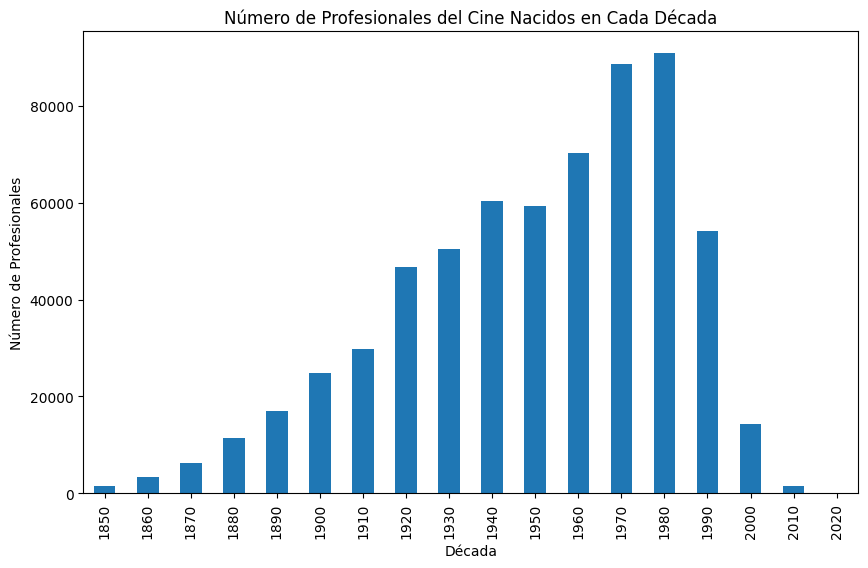

In [27]:
# Crear una columna para la década
df_name_basics_3['birthDecade'] = (df_name_basics_3['birthYear'] // 10) * 10

# # Contar el número de profesionales por década
# decade_counts = df_name_basics_3['birthDecade'].value_counts().sort_index()

# plt.figure(figsize=(10, 6))
# decade_counts.plot(kind='bar')
# plt.title('Número de Profesionales del Cine Nacidos en Cada Década')
# plt.xlabel('Década')
# plt.ylabel('Número de Profesionales')
# plt.show()

# Filtrar los años de nacimiento a partir de 1850
filtered_df = df_name_basics_3[(df_name_basics_3['birthYear'] >= 1850) & (df_name_basics_3['birthYear'] <= 2020)]


# Crear una columna para la década
filtered_df['birthDecade'] = (filtered_df['birthYear'] // 10) * 10

# Contar el número de profesionales por década
decade_counts = filtered_df['birthDecade'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
decade_counts.plot(kind='bar')
plt.title('Número de Profesionales del Cine Nacidos en Cada Década')
plt.xlabel('Década')
plt.ylabel('Número de Profesionales')
plt.show()

##### 5. ¿Qué actores/directores han trabajado más frecuentemente en títulos mejor calificados?

In [22]:


# Unir los DataFrames
df_merged_3_2 = pd.merge(df_name_basics_3, df_title_ratings_2, left_on='knownForTitles', right_on='tconst')

# Filtrar los títulos mejor calificados (por ejemplo, calificación promedio > 8)
top_rated_titles = df_merged_3_2[df_merged_3_2['averageRating'] > 8]

# Contar el número de títulos mejor calificados por actor/director
top_actors_directors = top_rated_titles.groupby('primaryName')['tconst'].count().sort_values(ascending=False)

# Seleccionar el Top 10
top_10_actors_directors = top_actors_directors.head(10)

# Crear la consola de Rich
console = Console()

# Crear la tabla
table = Table(title="Top 10 Actores/Directores con Más Títulos Mejor Calificados")

# Añadir columnas
table.add_column("Nombre", justify="left", style="cyan", no_wrap=True)
table.add_column("Número de Títulos", justify="right", style="green")

# Añadir filas
for name, count in top_10_actors_directors.items():
    table.add_row(name, str(count))

# Imprimir la tabla
console.print(table)


  Top 10 Actores/Directores con Más  
      Títulos Mejor Calificados      
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Nombre        ┃ Número de Títulos ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ David         │                44 │
│ Sam           │                36 │
│ John Williams │                36 │
│ John          │                34 │
│ Michael Smith │                32 │
│ Chris         │                31 │
│ Paul          │                29 │
│ Peter         │                28 │
│ Chris Johnson │                27 │
│ Nick          │                27 │
└───────────────┴───────────────────┘